<a href="https://colab.research.google.com/github/hrai/M4-Data-Analysis/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment link - https://github.com/junjy007/UTS_ML2019_Main/blob/master/A2_Specification.pdf

###Introduction




###Exploration


###Methodology


###Evaluation


###Ethical


###Conclusion


##Loading all M4 data for 2018-19

In [0]:
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt


urls=[
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-07.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-08.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-09.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-10.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-11.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-12.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-01.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-02.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-03.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-04.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-05.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-06.csv'
]

df = pd.concat(pd.read_csv(url, parse_dates={'DateTime': ['Date', 'IntervalStart']}) for url in urls)

In [2]:
count_row,count_col=df.shape

print('Total rows: ' + str(count_row))

df[:10]

Total rows: 1116404


,DateTime,AssetID,FinancialQtrID,IntervalEnd,Version,VehicleClass,TollPointID,GantryDirection,GantryLocation,GantryGPSLatitude,GantryGPSLongitude,GantryType,TotalVolume
0,2018-07-01,M4,201901,00:14,3,Car,TS0101,W,Church St Exit,-33.83,151.00,Mainline,310
1,2018-07-01,M4,201901,00:14,3,Truck,TS0101,W,Church St Exit,-33.83,151.00,Mainline,4
2,2018-07-01,M4,201901,00:14,3,Car,TS0102,E,Church St Entry,-33.83,151.00,Mainline,120
3,2018-07-01,M4,201901,00:14,3,Truck,TS0102,E,Church St Entry,-33.83,151.00,Mainline,2
4,2018-07-01,M4,201901,00:14,3,Car,TS0201,W,James Ruse Dr Entry,-33.83,151.02,Ramp,23
5,2018-07-01,M4,201901,00:14,3,Car,TS0202,E,James Ruse Dr Exit,-33.83,151.02,Ramp,4
6,2018-07-01,M4,201901,00:14,3,Car,TS0301,E,James Ruse Dr Entry,-33.83,151.02,Ramp,43
7,2018-07-01,M4,201901,00:14,3,Car,TS0401,W,James Ruse Dr Exit,-33.83,151.04,Ramp,81
8,2018-07-01,M4,201901,00:14,3,Car,TS0501,E,Silverwater Rd Exit,-33.84,151.04,Ramp,20
9,2018-07-01,M4,201901,00:14,3,Car,TS0601,W,Silverwater Rd Entry,-33.84,151.04,Ramp,39


In [3]:

total_vehicles=df['TotalVolume'].sum()
total_vehicles

100433186

In [4]:
df.columns

Index(['DateTime', 'AssetID', 'FinancialQtrID', 'IntervalEnd', 'Version',
       'VehicleClass', 'TollPointID', 'GantryDirection', 'GantryLocation',
       'GantryGPSLatitude', 'GantryGPSLongitude', 'GantryType', 'TotalVolume'],
      dtype='object')

In [5]:
total_cars = df.loc[df['VehicleClass']=='Car', 'VehicleClass'].value_counts()
print(f"total cars rows {total_cars}")

total_trucks = df.loc[df['VehicleClass']=='Truck', 'VehicleClass'].value_counts()
print(f"total trucks rows {total_trucks}")


total cars rows Car    584752
Name: VehicleClass, dtype: int64
total trucks rows Truck    531652
Name: VehicleClass, dtype: int64


## Check for null values



In [6]:
df.isnull().values.any()

False

In [7]:
df.values

array([[Timestamp('2018-07-01 00:00:00'), 'M4', 201901, ..., 151.0,
        'Mainline', 310],
       [Timestamp('2018-07-01 00:00:00'), 'M4', 201901, ..., 151.0,
        'Mainline', 4],
       [Timestamp('2018-07-01 00:00:00'), 'M4', 201901, ..., 151.0,
        'Mainline', 120],
       ...,
       [Timestamp('2019-06-30 23:45:00'), 'M4', 201904, ..., 151.07,
        'Ramp', 17],
       [Timestamp('2019-06-30 23:45:00'), 'M4', 201904, ..., 151.07,
        'Ramp', 4],
       [Timestamp('2019-06-30 23:45:00'), 'M4', 201904, ..., 151.07,
        'Mainline + G', 15]], dtype=object)

## Rename column

In [8]:
df.rename(columns={'TotalVolume': 'TrafficVolume', 'VehicleClass':'VehicleType'}, inplace=True)
df.columns

Index(['DateTime', 'AssetID', 'FinancialQtrID', 'IntervalEnd', 'Version',
       'VehicleType', 'TollPointID', 'GantryDirection', 'GantryLocation',
       'GantryGPSLatitude', 'GantryGPSLongitude', 'GantryType',
       'TrafficVolume'],
      dtype='object')

##Scatter plot of latitude and longitude

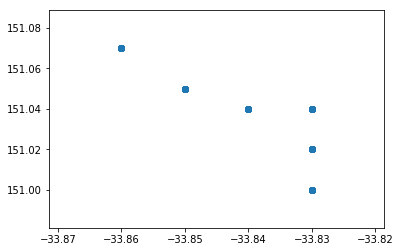

In [9]:
plt.scatter(x=df['GantryGPSLatitude'], y=df['GantryGPSLongitude'])
plt.show()

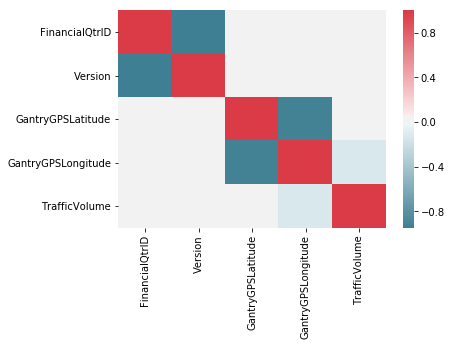

In [10]:
##Temp-remove - correlation heatmap
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))


## Checking latitute and longitude against GantryLocation

In [11]:
temp_df=df[['GantryLocation','GantryGPSLatitude','GantryGPSLongitude','TollPointID']].groupby(by=['GantryLocation'])
print(temp_df.first())

                            GantryGPSLatitude  GantryGPSLongitude TollPointID
GantryLocation                                                               
Church St Entry                        -33.83              151.00      TS0102
Church St Exit                         -33.83              151.00      TS0101
Hill Rd Entry                          -33.85              151.05      TS1001
Hill Rd Exit                           -33.85              151.05      TS0901
Homebush Bay Dr (NB) Entry             -33.86              151.07      TS1301
Homebush Bay Dr Entry                  -33.86              151.07      TS1401
Homebush Bay Dr Exit                   -33.86              151.07      TS1201
James Ruse Dr Entry                    -33.83              151.02      TS0201
James Ruse Dr Exit                     -33.83              151.02      TS0202
Silverwater Rd Entry                   -33.84              151.04      TS0601
Silverwater Rd Exit                    -33.84              151.0

##Checking unique values

In [15]:
print(df['AssetID'].unique())
print(df['Version'].unique())
print(df['FinancialQtrID'].unique())

locs=df['GantryLocation'].unique()
print(locs)
print(locs.size)
print(df['VehicleType'].unique())
print(df['GantryType'].unique())

['M4']
[3 2 1]
[201901 201902 201903 201904]
['Church St Exit' 'Church St Entry' 'James Ruse Dr Entry'
 'James Ruse Dr Exit' 'Silverwater Rd Exit' 'Silverwater Rd Entry'
 'Hill Rd Exit' 'Hill Rd Entry' 'Homebush Bay Dr Exit'
 'Homebush Bay Dr (NB) Entry' 'Homebush Bay Dr Entry']
11
['Car' 'Truck']
['Mainline' 'Ramp' 'Mainline + G']


## Drop unwanted columns like latitude and longitude

In [0]:
df.drop(['GantryGPSLatitude', 'GantryGPSLongitude','AssetID', 'Version','TollPointID','FinancialQtrID'], axis = 1, inplace=True)
df.columns

Index(['DateTime', 'IntervalEnd', 'VehicleType', 'GantryDirection',
       'GantryLocation', 'GantryType', 'TrafficVolume'],
      dtype='object')

##Grouping data

In [0]:
group_by_gantry_type = df[['GantryType', 'VehicleType','TrafficVolume']].groupby(by=['GantryType', 'VehicleType'])
group_by_gantry_type.head(2)


,GantryType,VehicleType,TrafficVolume
0,Mainline,Car,310
1,Mainline,Truck,4
2,Mainline,Car,120
3,Mainline,Truck,2
4,Ramp,Car,23
5,Ramp,Car,4
10,Ramp,Truck,1
13,Ramp,Truck,1
22,Mainline + G,Car,266
23,Mainline + G,Truck,3


##Getting average and total counts from the grouping

In [0]:
car_data_avg = group_by_gantry_type.mean()
car_data_count = group_by_gantry_type.count()

print(car_data_avg.head(2))

car_data_count

                        TrafficVolume
GantryType VehicleType               
Mainline   Car             407.192530
           Truck            34.623886


TrafficVolume
GantryType   VehicleType               
Mainline     Car                 102405
             Truck               101339
Mainline + G Car                  34896
             Truck                34034
Ramp         Car                 447451
             Truck               396279

##Plotting aggregates onto bar chart - Most of the vehicles are recorded via Ramp

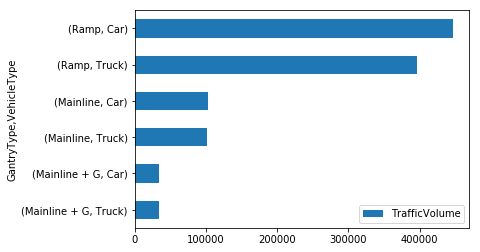

In [0]:
car_data_count.sort_values(by='TrafficVolume').plot(kind='barh')

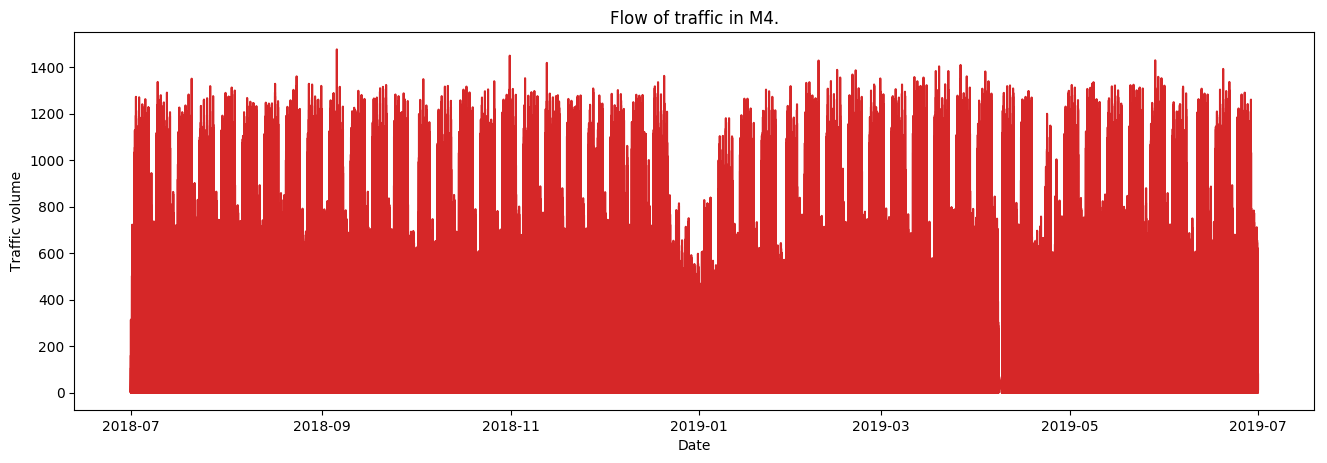

In [0]:

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Traffic volume', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['DateTime'], y=df['TrafficVolume'], title='Flow of traffic in M4.') 

##Scatter plot - Traffic in days of week


In [0]:
df['Day'] = df['DateTime'].dt.day_name()

sns.pairplot(x_vars=["Day"], y_vars=["TrafficVolume"],
             data=df, height=7)

##Scatter plot - Traffic in 12 months

In [0]:
df['Month'] = df['DateTime'].map(lambda x: x.strftime('%Y-%m'))

sns.pairplot(x_vars=["Month"], y_vars=["TrafficVolume"],
             data=df, height=11)

##Date filters for a day's data

In [0]:
start_date=pd.to_datetime('1 Jun 2019 00:00AM')
end_date=pd.to_datetime('1 Jun 2019 11:59PM')

#apply date filter
mask = (df['DateTime'] > start_date) & (df['DateTime'] <= end_date)
df_day=df.loc[mask]

#check unique value in month column
df_day.Month.unique()


In [0]:
df_day['Time'] = df_day['DateTime'].map(lambda x: x.strftime('%H:%M'))
df_day.drop(columns=['DateTime'], inplace=True)
df_day.head()


In [0]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,25))
sns.barplot(x='TrafficVolume', y='Time', data=df_day)

#from matplotlib import pyplot as plt

#plt.figure(figsize=(25,18))
#sns.lineplot(x='Time', y='TrafficVolume', data=df_day)



##Method to create rolling mean/std

In [0]:
def test_stationarity_of_timeseries(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


##Creating rolling mean/std

In [0]:
df_stationarity=df[['DateTime','TrafficVolume']].set_index('DateTime')
test_stationarity_of_timeseries(df_stationarity)

In [0]:
import numpy as np
df_stationarity_log = np.log(df_stationarity)
test_stationarity_of_timeseries(df_stationarity_log)

##Creating Test and Train datasets

In [0]:
df_prediction=df[['DateTime','TrafficVolume']]
df_prediction.set_index('DateTime', inplace=True)

train_size = int(len(df_prediction) * 0.66)
train, test = df_prediction[0:train_size], df_prediction[train_size:]

train.head(5)


In [0]:
# fit model
model = ARIMA(train.values.astype(float), order=(5,1,0))
fitted_model = model.fit(disp=0)
print(fitted_model.summary())
# plot residual errors
residuals = DataFrame(fitted_model.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

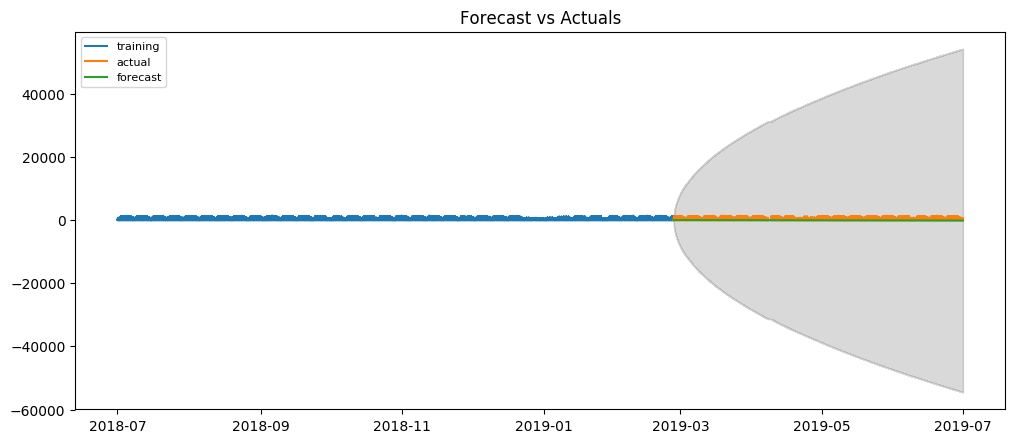

In [0]:

# Forecast
test_rows_count=test.shape[0]
fc, se, conf = fitted_model.forecast(test_rows_count, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()